In [1]:
import json
import os

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from coronavirus_map.domain.classifier import _string_contains_covid

In [2]:
# open all json

data_dicts = []

directory = '../data/news_articles/balanced_dataset/'
for file in os.listdir(directory):

    with open(os.path.join(directory, file), 'r') as f:
        data_dict = json.load(f)

    data_dicts.append(data_dict)

In [3]:
# filter data without hand labels

labeled_data_dicts = []

for data_dict in data_dicts:

    label_data = data_dict.get('LABEL')  # returns None if not key 'LABEL'

    if label_data is None:
        continue

    labeled_data_dicts.append(data_dict)

In [4]:
# build lists of true, predicted labels

true_labels = []

predicted_labels = []

for data_dict in labeled_data_dicts:

    label_data = data_dict.get('LABEL')

    true_label = label_data.get('WANT_ON_MAP')

    if true_label is None:
        continue

    true_labels.append(true_label)

    article_data = data_dict.get('ARTICLE', {})

    article_headline = article_data.get('TITLE', '')

    predicted_labels.append(_string_contains_covid(article_headline))

In [5]:
# check the accuracy -- looks really good!

score = accuracy_score(true_labels, predicted_labels)
print('Classifier accuracy score:', round(score, 3))

Classifier accuracy score: 0.979


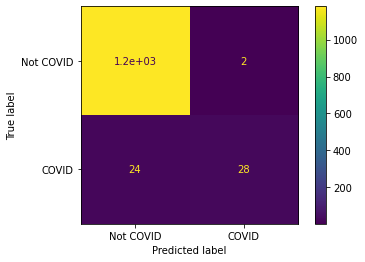

In [6]:
# display true positive, false positive, true negative, false negative rates -- really bad!

matrix = confusion_matrix(true_labels, predicted_labels)
display = ConfusionMatrixDisplay(matrix, ['Not COVID', 'COVID'])
display.plot();